In [1]:
# путь до данных на компьютере
path = '/content/drive/MyDrive/files_and_description/train_data'

In [2]:
# для работающих в Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [4]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [5]:
!pip install dill -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00


In [6]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
#from math import sqrt

import optuna

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import dill
import pickle

import warnings
warnings.filterwarnings('ignore')

## Снижение размерности

In [ ]:
# путь до данных на компьютере
path = '/content/drive/MyDrive/files_and_description/train_data'

In [ ]:
# для работающих в Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train = pd.read_parquet(path + '/min_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/min_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/min_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/min_y_test.parquet').drop('id', axis=1)


In [ ]:
y_train = pd.read_parquet(path + '/min_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/min_y_test.parquet').drop('id', axis=1)

In [ ]:
columns = x_train.columns.to_list()

In [ ]:
x_train.shape

(2100000, 220)

In [ ]:
comp = []
res = []
for i in range(20, 100, 10):
    trun_svd =  TruncatedSVD(n_components = i)
    trun_svd.fit(x_train)
    result = sum(trun_svd.explained_variance_ratio_)
    comp.append(i)
    res.append(round(result, 4))
    print(f'comp: {i}, res: {result}')



comp: 20, res: 0.9623806596993247
comp: 30, res: 0.9697688743350334
comp: 40, res: 0.9751147302246989
comp: 50, res: 0.9794928665877318
comp: 60, res: 0.9833859388746309
comp: 70, res: 0.9869932549840441
comp: 80, res: 0.9901517069543571
comp: 90, res: 0.9928155988071952


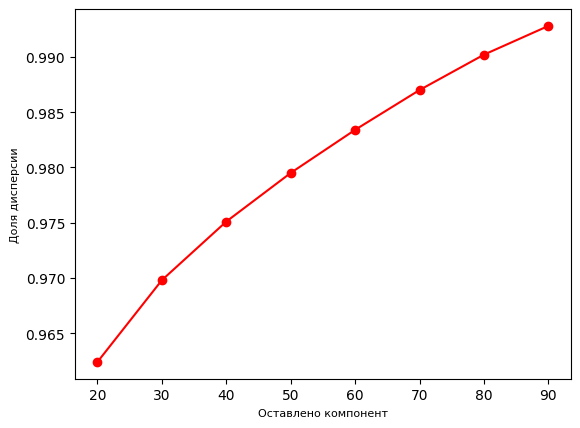

In [ ]:
plt.plot(comp, res,'ro-')
plt.xlabel('Оставлено компонент', fontsize=8)
plt.ylabel('Доля дисперсии', fontsize=8)
plt.savefig('Prop_of_Var.png')
plt.show()

In [ ]:
trun_svd =  TruncatedSVD(n_components = 50)
x_train_feat_sel = trun_svd.fit_transform(x_train)
x_test_feat_sel = trun_svd.transform(x_test)


In [ ]:
x_test_feat_sel.shape

(900000, 70)

In [ ]:
x_test_feat_sel

array([[ 4.77481362e+01, -1.13499921e+01,  8.67365288e+00, ...,
        -2.77343682e-01,  4.08403432e-02, -3.16664602e-01],
       [ 5.30657564e+00,  1.82886806e+00, -2.96041031e-01, ...,
        -1.65112403e-01,  4.16090670e-01,  2.77108375e-01],
       [ 4.64558646e+01, -3.17774256e+00,  2.24358900e+00, ...,
         9.34049240e-01,  9.44524026e-01, -4.14347559e-01],
       ...,
       [ 1.52264039e+01,  6.92694514e-01,  1.64685665e+00, ...,
        -3.90138573e-01, -1.14749775e-01,  1.77320227e-01],
       [ 2.56372427e+01,  7.99172738e+00, -8.49602142e-01, ...,
        -1.05595847e-01, -4.89424822e-01,  5.33090710e-01],
       [ 2.33302286e+01, -7.08040537e+00,  3.73905639e+00, ...,
        -8.26924805e-02,  2.41281524e-02, -2.85804830e-01]])

In [ ]:
cols = [str(i) for i in range(50)]

In [ ]:
x_train_feat_sel = pd.DataFrame(x_train_feat_sel, columns=cols)
x_test_feat_sel = pd.DataFrame(x_test_feat_sel, columns=cols)

NameError: name 'x_train_feat_sel' is not defined

In [ ]:
x_test_feat_sel.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,47.748136,-11.349992,8.673653,4.138859,0.001739,-1.680629,-2.671339,-3.907611,1.177955,-3.176397,...,1.062923,-0.571625,-0.498686,-0.627054,0.290090,0.698243,0.336028,-0.062288,0.742550,0.249823
1,5.306576,1.828868,-0.296041,0.157137,2.056028,-0.762477,0.658295,-0.722293,-0.078514,-0.164815,...,-0.624724,0.083548,-0.030163,-0.033021,-0.046462,-0.216834,-0.344722,-0.048524,0.020124,-0.129475
2,46.455865,-3.177743,2.243589,-2.127595,3.592635,-0.084988,-1.333395,-0.760883,-0.364753,-1.527561,...,0.443910,-0.378593,0.031117,0.202952,1.119691,0.862797,-0.606316,-1.466994,-0.856730,0.412779
3,24.050128,0.009916,4.305968,0.249731,4.191759,-1.353285,0.979239,0.276521,-2.477032,1.369812,...,-0.076358,0.554328,0.300944,-0.079756,-0.085979,0.797429,0.303029,-0.419720,1.142121,0.146824
4,19.902846,2.651239,1.765636,1.832136,0.311305,-2.188570,0.402448,-2.216912,0.700683,-0.859193,...,0.691996,-0.869009,-0.637925,-0.358820,-0.120176,-0.185459,-0.153570,-0.757881,0.270647,-0.149319


In [ ]:
x_train_feat_sel = x_train_feat_sel.astype('float32')
x_test_feat_sel = x_test_feat_sel.astype('float32')

In [ ]:
x_test_feat_sel.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,47.750000,-11.351562,8.671875,4.140625,0.001740,-1.680664,-2.671875,-3.908203,1.177734,-3.175781,...,0.365967,0.129883,0.121094,0.082031,0.475830,0.267822,0.359375,-0.277344,0.040833,-0.316650
1,5.304688,1.829102,-0.296143,0.157104,2.056641,-0.762695,0.658203,-0.722168,-0.078491,-0.164795,...,-0.370117,-0.156860,-0.163940,-0.010147,-0.183838,0.136963,-0.185669,-0.165161,0.416016,0.277100
2,46.468750,-3.177734,2.244141,-2.126953,3.591797,-0.084961,-1.333008,-0.760742,-0.364746,-1.527344,...,-0.081055,-0.395752,-0.463867,-0.028656,-0.225830,-0.159302,-0.435547,0.934082,0.944336,-0.414307
3,24.046875,0.009918,4.304688,0.249756,4.191406,-1.353516,0.979004,0.276611,-2.476562,1.370117,...,0.556152,-0.222656,0.141602,-0.159912,0.304199,0.468750,0.238403,0.596680,-0.012749,-0.527832
4,19.906250,2.650391,1.765625,1.832031,0.311279,-2.189453,0.402344,-2.216797,0.700684,-0.859375,...,0.228760,-0.562988,0.368652,0.459961,-0.387939,0.046753,0.535156,-0.226318,-0.266357,-0.281494


In [ ]:
x_test_feat_sel.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69'],
      dtype='object')

In [ ]:
x_train_feat_sel.to_parquet(os.path.join(path, f'feat_sel_min_x_train.parquet')).astype('float16')
x_test_feat_sel.to_parquet(os.path.join(path, f'feat_sel_min_x_test.parquet')).astype('float16')

NameError: name 'x_train_feat_sel' is not defined

In [ ]:
x_train_feat_sel = pd.read_parquet(path+'/feat_sel_min_x_train.parquet').astype('float16')
x_test_feat_sel = pd.read_parquet(path+'/feat_sel_min_x_test.parquet').astype('float16')

In [ ]:
x_train_feat_sel.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,88.000000,-25.312500,7.734375,3.373047,4.585938,1.785156,0.276367,-1.389648,-3.546875,-2.556641,...,-1.347656,0.611816,0.282227,0.625977,-0.291016,0.920410,0.759766,-0.171143,1.277344,0.189331
1,15.320312,1.814453,-0.877930,-0.210205,5.609375,-0.002474,1.201172,1.243164,-1.426758,-0.181030,...,-0.156616,0.471680,-0.489258,0.185791,-0.222168,0.621094,-0.050751,-0.648926,-0.432617,-0.103699
2,19.921875,-7.984375,0.605469,0.604492,2.587891,1.683594,0.000898,2.214844,1.952148,1.559570,...,-0.614258,0.030060,-0.505859,0.486572,0.080444,-0.255371,0.388184,0.740234,-1.104492,0.531738
3,13.578125,-6.636719,1.875977,-0.917969,1.704102,-1.853516,-0.118530,0.548828,-1.237305,0.521973,...,0.136597,-0.637695,-0.045349,-0.135010,-0.350830,0.044342,-0.118896,-0.098633,-0.018661,-0.490479
4,81.812500,-2.052734,-2.914062,1.449219,9.203125,-0.133911,-0.528320,6.472656,0.043945,0.380859,...,0.740723,-1.570312,0.380859,1.030273,0.771973,1.149414,0.612305,1.340820,0.762695,-0.582031


In [ ]:
del x_train
del x_test

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train_feat_sel, y_train)

pred_train = model_log_reg.predict(x_train_feat_sel)
pred_test = model_log_reg.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.500817912676988
test: 0.5006611230887893
test conf matrix: 
 [[867832    182]
 [ 31937     49]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train_feat_sel, y_train)

pred_train = model_lgbm.predict(x_train_feat_sel)
pred_test = model_lgbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.098661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035455 -> initscore=-3.303385
[LightGBM] [Info] Start training from score -3.303385
train: 0.5000589572961138
test: 0.5000607992729913
test conf matrix: 
 [[868011      3]
 [ 31982      4]]


In [ ]:
# с балансировкой классов
model_lgbm = LGBMClassifier(class_weight='balanced')
model_lgbm.fit(x_train_feat_sel, y_train)

pred_train = model_lgbm.predict(x_train_feat_sel)
pred_test = model_lgbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.323087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
train: 0.675164837989934
test: 0.6626970538308848
test conf matrix: 
 [[565136 302878]
 [ 10417  21569]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train_feat_sel, y_train)

pred_train = model_xbm.predict(x_train_feat_sel)
pred_test = model_xbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.5016318867516059
test: 0.500252571721952
test conf matrix: 
 [[867964     50]
 [ 31968     18]]


In [ ]:
# с балансировкой классов
model_xbm = XGBClassifier(class_weight='balanced')
model_xbm.fit(x_train_feat_sel, y_train)

pred_train = model_xbm.predict(x_train_feat_sel)
pred_test = model_xbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.5016318867516059
test: 0.500252571721952
test conf matrix: 
 [[867964     50]
 [ 31968     18]]


In [ ]:
model_catb = CatBoostClassifier()
model_catb.fit(x_train_feat_sel, y_train)

pred_train = model_catb.predict(x_train_feat_sel)
pred_test = model_catb.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

Learning rate set to 0.270098
0:	learn: 0.3747906	total: 949ms	remaining: 15m 48s
1:	learn: 0.2467902	total: 1.77s	remaining: 14m 43s
2:	learn: 0.1919636	total: 2.54s	remaining: 14m 3s
3:	learn: 0.1686874	total: 3.55s	remaining: 14m 43s
4:	learn: 0.1579861	total: 4.63s	remaining: 15m 20s
5:	learn: 0.1521504	total: 5.98s	remaining: 16m 30s
6:	learn: 0.1493038	total: 7s	remaining: 16m 32s
7:	learn: 0.1478711	total: 7.72s	remaining: 15m 57s
8:	learn: 0.1467517	total: 8.4s	remaining: 15m 24s
9:	learn: 0.1461108	total: 9.05s	remaining: 14m 56s
10:	learn: 0.1457055	total: 9.77s	remaining: 14m 38s
11:	learn: 0.1453585	total: 10.4s	remaining: 14m 18s
12:	learn: 0.1451379	total: 11.2s	remaining: 14m 7s
13:	learn: 0.1449114	total: 12s	remaining: 14m 3s
14:	learn: 0.1446737	total: 12.7s	remaining: 13m 54s
15:	learn: 0.1445186	total: 13.4s	remaining: 13m 46s
16:	learn: 0.1443788	total: 14.1s	remaining: 13m 36s
17:	learn: 0.1442796	total: 14.8s	remaining: 13m 26s
18:	learn: 0.1441376	total: 15.4s	r

In [ ]:
# с балансировкой классов
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train['flag'])
class_weights = dict(zip(classes, weights))

model_catb = CatBoostClassifier(class_weights=class_weights)
model_catb.fit(x_train_feat_sel, y_train)

pred_train = model_catb.predict(x_train_feat_sel)
pred_test = model_catb.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

Learning rate set to 0.270098
0:	learn: 0.6755841	total: 984ms	remaining: 16m 23s
1:	learn: 0.6637412	total: 1.75s	remaining: 14m 35s
2:	learn: 0.6568446	total: 2.45s	remaining: 13m 35s
3:	learn: 0.6516659	total: 3.2s	remaining: 13m 16s
4:	learn: 0.6473914	total: 3.94s	remaining: 13m 3s
5:	learn: 0.6440881	total: 4.65s	remaining: 12m 49s
6:	learn: 0.6416125	total: 5.93s	remaining: 14m
7:	learn: 0.6393363	total: 7.19s	remaining: 14m 51s
8:	learn: 0.6376989	total: 8.32s	remaining: 15m 15s
9:	learn: 0.6362489	total: 9.06s	remaining: 14m 57s
10:	learn: 0.6349790	total: 10.4s	remaining: 15m 39s
11:	learn: 0.6337167	total: 11.2s	remaining: 15m 22s
12:	learn: 0.6325831	total: 11.9s	remaining: 15m 4s
13:	learn: 0.6315619	total: 12.6s	remaining: 14m 49s
14:	learn: 0.6306662	total: 13.4s	remaining: 14m 37s
15:	learn: 0.6298219	total: 14.1s	remaining: 14m 25s
16:	learn: 0.6290827	total: 14.8s	remaining: 14m 13s
17:	learn: 0.6284062	total: 15.4s	remaining: 14m 1s
18:	learn: 0.6277214	total: 16.1s	

In [ ]:
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train_feat_sel, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-11 10:26:47,626] A new study created in memory with name: no-name-4f3fce99-0124-4813-86ba-cb74de625dd6
[I 2024-02-11 10:30:21,104] Trial 0 finished with value: 0.7173433665390375 and parameters: {'max_depth': 5, 'learning_rate': 0.04047951114746578, 'n_estimators': 230}. Best is trial 0 with value: 0.7173433665390375.
[I 2024-02-11 10:37:03,507] Trial 1 finished with value: 0.7046452041991218 and parameters: {'max_depth': 5, 'learning_rate': 0.2862559105055916, 'n_estimators': 567}. Best is trial 0 with value: 0.7173433665390375.
[I 2024-02-11 10:41:49,243] Trial 2 finished with value: 0.6602050169385131 and parameters: {'max_depth': 7, 'learning_rate': 2.809964106315185e-05, 'n_estimators': 261}. Best is trial 0 with value: 0.7173433665390375.
[I 2024-02-11 10:44:38,010] Trial 3 finished with value: 0.6403566502768295 and parameters: {'max_depth': 2, 'learning_rate': 0.001202914166804647, 'n_estimators': 319}. Best is trial 0 with value: 0.7173433665390375.
[I 2024-02-11 10

In [ ]:
study_lgbm.best_params

{'max_depth': 5, 'learning_rate': 0.06754653617684293, 'n_estimators': 420}

{'max_depth': 10, 'learning_rate': 0.035530338682115685, 'n_estimators': 614}. Best is trial 11 with value: 0.7229

In [ ]:
opt_model_lgbm = LGBMClassifier(**study_lgbm.best_params)
opt_model_lgbm.fit(x_train_feat_sel, y_train)

pred_train = opt_model_lgbm.predict(x_train_feat_sel)
pred_test = opt_model_lgbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.813150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035455 -> initscore=-3.303385
[LightGBM] [Info] Start training from score -3.303385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
# с балансировкой
opt_model_lgbm = LGBMClassifier(max_depth=5, learning_rate=0.06754653617684293, n_estimators=420, class_weight='balanced')
opt_model_lgbm.fit(x_train_feat_sel, y_train)

pred_train = opt_model_lgbm.predict(x_train_feat_sel)
pred_test = opt_model_lgbm.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.328313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
opt_model_catb = CatBoostClassifier(max_depth = 7, learning_rate =  0.19107171151392033, n_estimators = 136, l2_leaf_reg = 4)
opt_model_catb.fit(x_train_feat_sel, y_train)

pred_train = opt_model_catb.predict(x_train_feat_sel)
pred_test = opt_model_catb.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

0:	learn: 0.4478266	total: 822ms	remaining: 1m 50s
1:	learn: 0.3141861	total: 1.34s	remaining: 1m 29s
2:	learn: 0.2429194	total: 1.91s	remaining: 1m 24s
3:	learn: 0.2028646	total: 2.51s	remaining: 1m 22s
4:	learn: 0.1807790	total: 3.05s	remaining: 1m 19s
5:	learn: 0.1681337	total: 3.56s	remaining: 1m 17s
6:	learn: 0.1595936	total: 4.24s	remaining: 1m 18s
7:	learn: 0.1550436	total: 4.81s	remaining: 1m 17s
8:	learn: 0.1516302	total: 5.38s	remaining: 1m 15s
9:	learn: 0.1494762	total: 5.86s	remaining: 1m 13s
10:	learn: 0.1480799	total: 6.38s	remaining: 1m 12s
11:	learn: 0.1471039	total: 6.93s	remaining: 1m 11s
12:	learn: 0.1464747	total: 7.49s	remaining: 1m 10s
13:	learn: 0.1460053	total: 8.26s	remaining: 1m 11s
14:	learn: 0.1455668	total: 8.91s	remaining: 1m 11s
15:	learn: 0.1451941	total: 9.69s	remaining: 1m 12s
16:	learn: 0.1449197	total: 10.5s	remaining: 1m 13s
17:	learn: 0.1447011	total: 11.6s	remaining: 1m 16s
18:	learn: 0.1445055	total: 12.6s	remaining: 1m 17s
19:	learn: 0.1443355	t

In [ ]:
# с балансировкой
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train['flag'])
class_weights = dict(zip(classes, weights))

opt_model_catb = CatBoostClassifier(max_depth = 7, learning_rate =  0.19107171151392033, n_estimators = 136, l2_leaf_reg = 4, class_weights=class_weights)
opt_model_catb.fit(x_train_feat_sel, y_train)

pred_train = opt_model_catb.predict(x_train_feat_sel)
pred_test = opt_model_catb.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

0:	learn: 0.6795174	total: 1.04s	remaining: 2m 20s
1:	learn: 0.6690053	total: 2.59s	remaining: 2m 53s
2:	learn: 0.6620686	total: 3.9s	remaining: 2m 53s
3:	learn: 0.6561042	total: 5.19s	remaining: 2m 51s
4:	learn: 0.6515308	total: 6.32s	remaining: 2m 45s
5:	learn: 0.6481029	total: 7.32s	remaining: 2m 38s
6:	learn: 0.6449347	total: 8.33s	remaining: 2m 33s
7:	learn: 0.6423794	total: 9.3s	remaining: 2m 28s
8:	learn: 0.6403765	total: 10.4s	remaining: 2m 26s
9:	learn: 0.6386144	total: 11.6s	remaining: 2m 25s
10:	learn: 0.6369531	total: 12.5s	remaining: 2m 21s
11:	learn: 0.6356664	total: 13.2s	remaining: 2m 16s
12:	learn: 0.6343993	total: 14.1s	remaining: 2m 13s
13:	learn: 0.6334161	total: 14.9s	remaining: 2m 10s
14:	learn: 0.6323426	total: 16.3s	remaining: 2m 11s
15:	learn: 0.6314776	total: 17.6s	remaining: 2m 11s
16:	learn: 0.6307389	total: 18.8s	remaining: 2m 11s
17:	learn: 0.6295785	total: 19.6s	remaining: 2m 8s
18:	learn: 0.6287574	total: 20.5s	remaining: 2m 5s
19:	learn: 0.6280880	total

In [ ]:
y_train.value_counts()

flag
0       2025544
1         74456
dtype: int64

In [ ]:
y_test.value_counts()

flag
0       868014
1        31986
dtype: int64

In [ ]:
estimators = [
    ('lgbm', opt_model_lgbm),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train_feat_sel, y_train)
pred_train = reg.predict(x_train_feat_sel)
pred_test = reg.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.336492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035455 -> initscore=-3.303385
[LightGBM] [Info] Start training from score -3.303385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
# с балансировкой
estimators = [
    ('lgbm', opt_model_lgbm),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(random_state=1, class_weight='balanced'))

reg.fit(x_train_feat_sel, y_train)
pred_train = reg.predict(x_train_feat_sel)
pred_test = reg.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.244711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

XGB Trial 48 finished with value: 0.7247609613978563 and parameters: {'max_depth': 8, 'learning_rate': 0.019440445008201374, 'n_estimators': 650}. Best is trial 48 with value: 0.7247609613978563.

In [ ]:
opt_model_xgb = XGBClassifier(max_depth=8, learning_rate=0.019440445008201374, n_estimators=650)
opt_model_xgb.fit(x_train_feat_sel, y_train)

pred_train = opt_model_xgb.predict(x_train_feat_sel)
pred_test = opt_model_xgb.predict(x_test_feat_sel)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.5011140117951506
test: 0.5001656139248932
test conf matrix: 
 [[868003     11]
 [ 31975     11]]


##Старое: обучение на 222 признаках

In [7]:
x_train = pd.read_parquet(path + '/min_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/min_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/min_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/min_y_test.parquet').drop('id', axis=1)

In [ ]:
x_train.shape

(2100000, 220)

In [ ]:
x_test.shape

(900000, 220)

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train, y_train)

pred_train = model_log_reg.predict(x_train)
pred_test = model_log_reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.5006086981473608
test: 0.5004318297530267
test conf matrix: 
 [[867841    173]
 [ 31952     34]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 5.665577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3878
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035455 -> initscore=-3.303385
[LightGBM] [Info] Start training from score -3.303385
train: 0.5000791034226854
test: 0.5000457434616374
test conf matrix: 
 [[868012      2]
 [ 31983      3]]


In [9]:
# с балансировкой классов
model_lgbm = LGBMClassifier(class_weight='balanced')
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.811692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3878
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
train: 0.6877738625212068
test: 0.6796169973913594
test conf matrix: 
 [[572474 295540]
 [  9605  22381]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.5024124523946121
test: 0.5007152696808949
test conf matrix: 
 [[867926     88]
 [ 31937     49]]


In [10]:
y_train.value_counts()

flag
0       2025544
1         74456
dtype: int64

In [11]:
2025544/74456

27.204577199957022

In [12]:
# с балансировкой классов
model_xbm = XGBClassifier(scale_pos_weight=27)
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7121864315800754
test: 0.6766989042557745
test conf matrix: 
 [[600787 267227]
 [ 10835  21151]]


In [ ]:
model_catb = CatBoostClassifier()
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

Learning rate set to 0.270098
0:	learn: 0.3741723	total: 1.3s	remaining: 21m 40s
1:	learn: 0.2473445	total: 2.29s	remaining: 19m 3s
2:	learn: 0.1934488	total: 3.67s	remaining: 20m 18s
3:	learn: 0.1691090	total: 5.09s	remaining: 21m 8s
4:	learn: 0.1575900	total: 6.74s	remaining: 22m 21s
5:	learn: 0.1520792	total: 9.21s	remaining: 25m 25s
6:	learn: 0.1488467	total: 11.7s	remaining: 27m 45s
7:	learn: 0.1472151	total: 13.3s	remaining: 27m 24s
8:	learn: 0.1462331	total: 14.7s	remaining: 26m 58s
9:	learn: 0.1454603	total: 16.3s	remaining: 26m 52s
10:	learn: 0.1448576	total: 18s	remaining: 26m 57s
11:	learn: 0.1444927	total: 19.6s	remaining: 26m 51s
12:	learn: 0.1439314	total: 21.4s	remaining: 27m 6s
13:	learn: 0.1437106	total: 24.3s	remaining: 28m 32s
14:	learn: 0.1434507	total: 26.3s	remaining: 28m 45s
15:	learn: 0.1432514	total: 28.1s	remaining: 28m 46s
16:	learn: 0.1431429	total: 29.3s	remaining: 28m 13s
17:	learn: 0.1430065	total: 30.6s	remaining: 27m 48s
18:	learn: 0.1428924	total: 32.1

In [13]:
# с балансировкой классов
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train['flag'])
class_weights = dict(zip(classes, weights))

model_catb = CatBoostClassifier(class_weights=class_weights, verbose=False)
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.753122237508023
test: 0.6730652402971351
test conf matrix: 
 [[625931 242083]
 [ 11994  19992]]


In [20]:
# обучение дефолтных моделей, проверить балансировку классов
estimators = [
    ('lgbm', model_lgbm),
    ('xgb', model_xbm),
    ('cb', model_catb)
    ]

sample_weights = np.zeros(len(y_train))
sample_weights[y_train['flag'] == 0] = 1.0
sample_weights[y_train['flag'] == 1] = 27.0

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train, sample_weight=sample_weights)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74456, number of negative: 2025544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.547675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3878
[LightGBM] [Info] Number of data points in the train set: 2100000, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.964286 -> initscore=3.295837
[LightGBM] [Info] Start training from score 3.295837
[LightGBM] [Info] Number of positive: 59565, number of negative: 1620435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 5.481097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3865
[LightGBM] [Info] Number of data points in the train set: 1680000, number of used features: 219
[LightGBM]

In [ ]:
with open(os.path.join(path, f'222_default_model.pkl'), 'wb') as file:
    dill.dump(reg, file)

In [ ]:
with open(path + '/222_default_model.pkl', 'rb') as file:
    222_default_model = dill.load(file)
222_default_model

StackingClassifier(estimators=[('lgbm', LGBMClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7d38094fbb80>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [8]:
# не запускается - выдает ошибку переполнения памяти.
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-23 10:14:18,691] A new study created in memory with name: no-name-9a589ebb-8614-432f-9602-1a60ec6d0521
[W 2024-02-23 10:14:33,944] Trial 0 failed with parameters: {'max_depth': 3, 'learning_rate': 0.777730918778325, 'n_estimators': 61} because of the following error: TerminatedWorkerError('A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.\n\nThe exit codes of the workers are {SIGKILL(-9)}').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-8-7c090013dbec>", line 6, in objective_lgbm
    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_se

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
study_lgbm.best_params

In [ ]:
opt_model_lgbm = LGBMClassifier(**study_lgbm.best_params)
opt_model_lgbm.fit(x_train, y_train)

pred_train = opt_model_lgbm.predict(x_train)
pred_test = opt_model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

## Downsampling 222 feat

In [ ]:
x_train = pd.read_parquet(path + '/ds_min_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/ds_min_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/ds_min_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/ds_min_y_test.parquet').drop('id', axis=1)

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train, y_train)

pred_train = model_log_reg.predict(x_train)
pred_test = model_log_reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.6673738068939925
test: 0.6643939694283889
test conf matrix: 
 [[20163 11710]
 [ 9720 22273]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74449, number of negative: 74569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.408629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3855
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499597 -> initscore=-0.001611
[LightGBM] [Info] Start training from score -0.001611
train: 0.6943635650510611
test: 0.6789568416448643
test conf matrix: 
 [[20912 10961]
 [ 9540 22453]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7315510405626264
test: 0.6768461455624497
test conf matrix: 
 [[21163 10710]
 [ 9927 22066]]


In [ ]:
model_catb = CatBoostClassifier()
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

Learning rate set to 0.087278
0:	learn: 0.6863191	total: 218ms	remaining: 3m 37s
1:	learn: 0.6807780	total: 366ms	remaining: 3m 2s
2:	learn: 0.6757498	total: 487ms	remaining: 2m 41s
3:	learn: 0.6714841	total: 610ms	remaining: 2m 32s
4:	learn: 0.6674330	total: 767ms	remaining: 2m 32s
5:	learn: 0.6639273	total: 886ms	remaining: 2m 26s
6:	learn: 0.6609987	total: 1s	remaining: 2m 22s
7:	learn: 0.6581947	total: 1.15s	remaining: 2m 23s
8:	learn: 0.6553109	total: 1.31s	remaining: 2m 24s
9:	learn: 0.6529071	total: 1.47s	remaining: 2m 25s
10:	learn: 0.6508180	total: 1.61s	remaining: 2m 24s
11:	learn: 0.6488189	total: 1.74s	remaining: 2m 23s
12:	learn: 0.6467174	total: 1.86s	remaining: 2m 20s
13:	learn: 0.6449168	total: 1.99s	remaining: 2m 20s
14:	learn: 0.6433705	total: 2.13s	remaining: 2m 20s
15:	learn: 0.6418639	total: 2.25s	remaining: 2m 18s
16:	learn: 0.6404114	total: 2.39s	remaining: 2m 18s
17:	learn: 0.6390782	total: 2.54s	remaining: 2m 18s
18:	learn: 0.6378622	total: 2.68s	remaining: 2m 

In [ ]:
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-12 14:02:31,259] A new study created in memory with name: no-name-8cc9f1b5-9eed-4def-be83-3abc910f5ea2
[I 2024-02-12 14:03:48,771] Trial 0 finished with value: 0.72371293043831 and parameters: {'max_depth': 8, 'learning_rate': 0.006942595306994207, 'n_estimators': 369}. Best is trial 0 with value: 0.72371293043831.
[I 2024-02-12 14:04:47,850] Trial 1 finished with value: 0.662459687184806 and parameters: {'max_depth': 3, 'learning_rate': 0.0006067840574096312, 'n_estimators': 530}. Best is trial 0 with value: 0.72371293043831.
[I 2024-02-12 14:05:37,198] Trial 2 finished with value: 0.6720922898279933 and parameters: {'max_depth': 14, 'learning_rate': 8.15729914954362e-05, 'n_estimators': 239}. Best is trial 0 with value: 0.72371293043831.
[I 2024-02-12 14:07:04,821] Trial 3 finished with value: 0.7439507775617039 and parameters: {'max_depth': 14, 'learning_rate': 0.037517451085913964, 'n_estimators': 582}. Best is trial 3 with value: 0.7439507775617039.
[I 2024-02-12 14:08:

In [ ]:
study_lgbm.best_params

{'max_depth': 14, 'learning_rate': 0.03529182073533376, 'n_estimators': 649}

Trial 20 finished with value: 0.7443991240424653 and parameters: {'max_depth': 14, 'learning_rate': 0.05718851664268871, 'n_estimators': 641}. Best is trial 20 with value: 0.7443991240424653.

In [ ]:
opt_model_lgbm = LGBMClassifier(max_depth=14, learning_rate=0.05718851664268871, n_estimators=641)
opt_model_lgbm.fit(x_train, y_train)

pred_train = opt_model_lgbm.predict(x_train)
pred_test = opt_model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74449, number of negative: 74569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.427142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3855
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499597 -> initscore=-0.001611
[LightGBM] [Info] Start training from score -0.001611
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you

In [ ]:
def objective_xgb(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(XGBClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2024-02-12 15:15:54,834] A new study created in memory with name: no-name-cc926de3-f4cb-4cbb-8e89-d4f6e69fe135
[I 2024-02-12 15:16:54,414] Trial 0 finished with value: 0.6807203949126032 and parameters: {'max_depth': 11, 'learning_rate': 0.000564231526013333, 'n_estimators': 98}. Best is trial 0 with value: 0.6807203949126032.
[I 2024-02-12 15:18:20,260] Trial 1 finished with value: 0.6642473675018291 and parameters: {'max_depth': 13, 'learning_rate': 1.1706615871894162e-05, 'n_estimators': 101}. Best is trial 0 with value: 0.6807203949126032.
[I 2024-02-12 15:19:06,493] Trial 2 finished with value: 0.6311038903593736 and parameters: {'max_depth': 3, 'learning_rate': 1.378452314561988e-05, 'n_estimators': 293}. Best is trial 0 with value: 0.6807203949126032.
[I 2024-02-12 15:20:21,451] Trial 3 finished with value: 0.7440286541992114 and parameters: {'max_depth': 6, 'learning_rate': 0.06288398991497926, 'n_estimators': 427}. Best is trial 3 with value: 0.7440286541992114.
[I 2024-02-

In [ ]:
study_xgb.best_params

{'max_depth': 8, 'learning_rate': 0.023321997996299994, 'n_estimators': 686}

In [ ]:
opt_model_xgb = XGBClassifier(max_depth=8, learning_rate=0.023321997996299994, n_estimators=686)
opt_model_xgb.fit(x_train, y_train)

pred_train = opt_model_xgb.predict(x_train)
pred_test = opt_model_xgb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7725057376250682
test: 0.6826777816672277
test conf matrix: 
 [[21201 10672]
 [ 9592 22401]]


In [ ]:
def objective_catboost(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 150)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 5)

    score = cross_val_score(CatBoostClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate, l2_leaf_reg=l2_leaf_reg),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)

[I 2024-02-12 18:24:46,925] A new study created in memory with name: no-name-8c27cd4a-d595-4beb-9040-4e5316ead27e
[I 2024-02-12 18:26:18,787] Trial 0 finished with value: 0.7083641927512024 and parameters: {'max_depth': 13, 'learning_rate': 0.01943100958284659, 'n_estimators': 28, 'l2_leaf_reg': 5}. Best is trial 0 with value: 0.7083641927512024.
[I 2024-02-12 18:26:40,936] Trial 1 finished with value: 0.7211363362225174 and parameters: {'max_depth': 6, 'learning_rate': 0.07123988723862416, 'n_estimators': 61, 'l2_leaf_reg': 5}. Best is trial 1 with value: 0.7211363362225174.
[I 2024-02-12 18:28:27,218] Trial 2 finished with value: 0.7155300242288561 and parameters: {'max_depth': 12, 'learning_rate': 0.023544977806083226, 'n_estimators': 49, 'l2_leaf_reg': 3}. Best is trial 1 with value: 0.7211363362225174.
[I 2024-02-12 18:29:13,526] Trial 3 finished with value: 0.7140397783627727 and parameters: {'max_depth': 7, 'learning_rate': 0.7723168615265839, 'n_estimators': 137, 'l2_leaf_reg':

In [ ]:
study_catboost.best_params

{'max_depth': 6,
 'learning_rate': 0.2592363872214876,
 'n_estimators': 132,
 'l2_leaf_reg': 5}

In [ ]:
opt_model_catb = CatBoostClassifier(**study_catboost.best_params)
opt_model_catb.fit(x_train, y_train)

pred_train = opt_model_catb.predict(x_train)
pred_test = opt_model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

0:	learn: 0.6749255	total: 191ms	remaining: 25s
1:	learn: 0.6619847	total: 336ms	remaining: 21.8s
2:	learn: 0.6535944	total: 528ms	remaining: 22.7s
3:	learn: 0.6477695	total: 658ms	remaining: 21s
4:	learn: 0.6418796	total: 820ms	remaining: 20.8s
5:	learn: 0.6378747	total: 968ms	remaining: 20.3s
6:	learn: 0.6348522	total: 1.13s	remaining: 20.2s
7:	learn: 0.6318846	total: 1.28s	remaining: 19.9s
8:	learn: 0.6284329	total: 1.44s	remaining: 19.6s
9:	learn: 0.6265245	total: 1.56s	remaining: 19.1s
10:	learn: 0.6248702	total: 1.72s	remaining: 19s
11:	learn: 0.6228020	total: 1.88s	remaining: 18.8s
12:	learn: 0.6211927	total: 2.01s	remaining: 18.4s
13:	learn: 0.6196354	total: 2.18s	remaining: 18.4s
14:	learn: 0.6185548	total: 2.32s	remaining: 18.1s
15:	learn: 0.6172276	total: 2.44s	remaining: 17.7s
16:	learn: 0.6155196	total: 2.61s	remaining: 17.7s
17:	learn: 0.6143789	total: 2.74s	remaining: 17.4s
18:	learn: 0.6134893	total: 2.88s	remaining: 17.2s
19:	learn: 0.6128294	total: 3s	remaining: 16.8s

In [ ]:
estimators = [
    ('lgbm', opt_model_lgbm),
    ('xgb', opt_model_xgb),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74449, number of negative: 74569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.450811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3855
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499597 -> initscore=-0.001611
[LightGBM] [Info] Start training from score -0.001611
0:	learn: 0.6749255	total: 130ms	remaining: 17s
1:	learn: 0.6619847	total: 281ms	remaining: 18.3s
2:	learn: 0.6535944	total: 437ms	remaining: 18.8s
3:	learn: 0.6477695	total: 562ms

## Downsampling 338 feat

In [ ]:
x_train = pd.read_parquet(path + '/ds_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/ds_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/ds_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/ds_y_test.parquet').drop('id', axis=1)

In [ ]:
x_train.shape

(149018, 337)

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train, y_train)

pred_train = model_log_reg.predict(x_train)
pred_test = model_log_reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.6767731106075037
test: 0.6741866563801957
test conf matrix: 
 [[21059 10894]
 [ 9915 21998]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 74529, number of negative: 74489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.553334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 306
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500134 -> initscore=0.000537
[LightGBM] [Info] Start training from score 0.000537
train: 0.7009620125306208
test: 0.684856250218486
test conf matrix: 
 [[21061 10892]
 [ 9236 22677]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_proba = pd.DataFrame({'proba': model_lgbm.predict_proba(x_test)[:,1].T})

treshold = 0
best_res = 0
for i in np.arange(0.05, 0.95, 0.05):
    res = pred_proba['proba'].apply(lambda x:0 if x < i else 1)
    tmp_score = round(roc_auc_score(y_test, res), 4)
    if tmp_score > best_res:
        best_res = tmp_score
        treshold = i
    print(f"i - {i}, res - {tmp_score}")
print(treshold)
print(best_res)

[LightGBM] [Info] Number of positive: 74529, number of negative: 74489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.559626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 306
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500134 -> initscore=0.000537
[LightGBM] [Info] Start training from score 0.000537
i - 0.05, res - 0.5001
i - 0.1, res - 0.5128
i - 0.15000000000000002, res - 0.5447
i - 0.2, res - 0.5781
i - 0.25, res - 0.6069
i - 0.3, res - 0.6324
i - 0.35000000000000003, res - 0.6548
i - 0.4, res - 0.6711
i - 0.45, res - 0.6821
i - 0.5, res - 0.6849
i - 0.55, res - 0.6805
i - 0.6000000000000001, res - 0.6674
i - 0.6500000000000001, res - 0.6457
i - 0.7000000000000001, res - 0.6139
i - 0.7500000000000001, res - 0.58
i - 0.8, res - 0.5

In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7359282872713648
test: 0.681980685606305
test conf matrix: 
 [[21489 10464]
 [ 9847 22066]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_proba = pd.DataFrame({'proba': model_xbm.predict_proba(x_test)[:,1].T})

treshold = 0
best_res = 0
for i in np.arange(0.05, 0.95, 0.05):
    res = pred_proba['proba'].apply(lambda x:0 if x < i else 1)
    tmp_score = round(roc_auc_score(y_test, res), 4)
    if tmp_score > best_res:
        best_res = tmp_score
        treshold = i
    print(f"i - {i}, res - {tmp_score}")
print(treshold)
print(best_res)

i - 0.05, res - 0.5022
i - 0.1, res - 0.5221
i - 0.15000000000000002, res - 0.5545
i - 0.2, res - 0.588
i - 0.25, res - 0.6165
i - 0.3, res - 0.6403
i - 0.35000000000000003, res - 0.659
i - 0.4, res - 0.6723
i - 0.45, res - 0.6803
i - 0.5, res - 0.682
i - 0.55, res - 0.6769
i - 0.6000000000000001, res - 0.6667
i - 0.6500000000000001, res - 0.6485
i - 0.7000000000000001, res - 0.6239
i - 0.7500000000000001, res - 0.596
i - 0.8, res - 0.5665
i - 0.8500000000000001, res - 0.5364
i - 0.9000000000000001, res - 0.5129
0.5
0.682


In [ ]:
model_catb = CatBoostClassifier()
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

Learning rate set to 0.087278
0:	learn: 0.6853203	total: 227ms	remaining: 3m 46s
1:	learn: 0.6784332	total: 386ms	remaining: 3m 12s
2:	learn: 0.6722734	total: 572ms	remaining: 3m 10s
3:	learn: 0.6668897	total: 762ms	remaining: 3m 9s
4:	learn: 0.6621721	total: 931ms	remaining: 3m 5s
5:	learn: 0.6583644	total: 1.09s	remaining: 3m
6:	learn: 0.6548527	total: 1.27s	remaining: 2m 59s
7:	learn: 0.6515997	total: 1.44s	remaining: 2m 58s
8:	learn: 0.6486987	total: 1.58s	remaining: 2m 54s
9:	learn: 0.6458337	total: 1.77s	remaining: 2m 55s
10:	learn: 0.6435745	total: 1.91s	remaining: 2m 51s
11:	learn: 0.6411898	total: 2.06s	remaining: 2m 49s
12:	learn: 0.6391037	total: 2.23s	remaining: 2m 49s
13:	learn: 0.6372205	total: 2.4s	remaining: 2m 49s
14:	learn: 0.6354741	total: 2.56s	remaining: 2m 48s
15:	learn: 0.6339281	total: 2.75s	remaining: 2m 48s
16:	learn: 0.6324966	total: 3.03s	remaining: 2m 55s
17:	learn: 0.6312105	total: 3.33s	remaining: 3m 1s
18:	learn: 0.6297366	total: 3.63s	remaining: 3m 7s
1

In [ ]:
## попробую вероятности и подбор порога
model_catb = CatBoostClassifier()
model_catb.fit(x_train, y_train)

#pred_train = model_catb.predict(x_train)
pred_proba = pd.DataFrame({'proba': model_catb.predict_proba(x_test)[:,1].T})

Learning rate set to 0.087278
0:	learn: 0.6853203	total: 231ms	remaining: 3m 50s
1:	learn: 0.6784332	total: 385ms	remaining: 3m 11s
2:	learn: 0.6722734	total: 558ms	remaining: 3m 5s
3:	learn: 0.6668897	total: 745ms	remaining: 3m 5s
4:	learn: 0.6621721	total: 907ms	remaining: 3m
5:	learn: 0.6583644	total: 1.07s	remaining: 2m 57s
6:	learn: 0.6548527	total: 1.24s	remaining: 2m 56s
7:	learn: 0.6515997	total: 1.41s	remaining: 2m 54s
8:	learn: 0.6486987	total: 1.55s	remaining: 2m 50s
9:	learn: 0.6458337	total: 1.73s	remaining: 2m 51s
10:	learn: 0.6435745	total: 1.86s	remaining: 2m 47s
11:	learn: 0.6411898	total: 2s	remaining: 2m 45s
12:	learn: 0.6391037	total: 2.17s	remaining: 2m 45s
13:	learn: 0.6372205	total: 2.33s	remaining: 2m 44s
14:	learn: 0.6354741	total: 2.49s	remaining: 2m 43s
15:	learn: 0.6339281	total: 2.65s	remaining: 2m 42s
16:	learn: 0.6324966	total: 2.82s	remaining: 2m 43s
17:	learn: 0.6312105	total: 2.96s	remaining: 2m 41s
18:	learn: 0.6297366	total: 3.2s	remaining: 2m 45s
19

In [ ]:
treshold = 0
best_res = 0
for i in np.arange(0.05, 0.95, 0.05):
    res = pred_proba['proba'].apply(lambda x:0 if x < i else 1)
    tmp_score = round(roc_auc_score(y_test, res), 4)
    if tmp_score > best_res:
        best_res = tmp_score
        treshold = i
    print(f"i - {i}, res - {tmp_score}")
print(treshold)
print(best_res)

i - 0.05, res - 0.5021
i - 0.1, res - 0.5207
i - 0.15000000000000002, res - 0.5509
i - 0.2, res - 0.5831
i - 0.25, res - 0.6141
i - 0.3, res - 0.6413
i - 0.35000000000000003, res - 0.6619
i - 0.4, res - 0.6771
i - 0.45, res - 0.6871
i - 0.5, res - 0.6886
i - 0.55, res - 0.6827
i - 0.6000000000000001, res - 0.6707
i - 0.6500000000000001, res - 0.6502
i - 0.7000000000000001, res - 0.623
i - 0.7500000000000001, res - 0.5942
i - 0.8, res - 0.5617
i - 0.8500000000000001, res - 0.5328
i - 0.9000000000000001, res - 0.5111
0.5
0.6886


In [ ]:
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-13 12:36:31,472] A new study created in memory with name: no-name-1880a6e1-b227-4a25-a480-86d81b3c5cfe
[I 2024-02-13 12:37:09,660] Trial 0 finished with value: 0.6812840715383398 and parameters: {'max_depth': 6, 'learning_rate': 0.00011859471033414236, 'n_estimators': 140}. Best is trial 0 with value: 0.6812840715383398.
[I 2024-02-13 12:37:36,292] Trial 1 finished with value: 0.6102473752179339 and parameters: {'max_depth': 2, 'learning_rate': 1.0800540338210664e-05, 'n_estimators': 222}. Best is trial 0 with value: 0.6812840715383398.
[I 2024-02-13 12:39:00,935] Trial 2 finished with value: 0.6879447534206401 and parameters: {'max_depth': 11, 'learning_rate': 6.251357097363783e-05, 'n_estimators': 396}. Best is trial 2 with value: 0.6879447534206401.
[I 2024-02-13 12:40:06,021] Trial 3 finished with value: 0.6805921457740766 and parameters: {'max_depth': 7, 'learning_rate': 0.9694155722043523, 'n_estimators': 544}. Best is trial 2 with value: 0.6879447534206401.
[I 2024-02

In [ ]:
study_lgbm.best_params

{'max_depth': 15, 'learning_rate': 0.037411732809586755, 'n_estimators': 669}

In [ ]:
opt_model_lgbm = LGBMClassifier(max_depth=15, learning_rate=0.037411732809586755, n_estimators=669)
opt_model_lgbm.fit(x_train, y_train)

pred_train = opt_model_lgbm.predict(x_train)
pred_test = opt_model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74529, number of negative: 74489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.638769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 306
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500134 -> initscore=0.000537
[LightGBM] [Info] Start training from score 0.000537
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you d

In [ ]:
def objective_xgb(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(XGBClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2024-02-13 13:45:34,350] A new study created in memory with name: no-name-e5b16c2b-d2d3-47a4-aa1b-1780a5a33c64
[I 2024-02-13 13:46:33,092] Trial 0 finished with value: 0.6884904588336352 and parameters: {'max_depth': 6, 'learning_rate': 0.00036612120307004284, 'n_estimators': 142}. Best is trial 0 with value: 0.6884904588336352.
[I 2024-02-13 13:47:00,801] Trial 1 finished with value: 0.6996296860616534 and parameters: {'max_depth': 9, 'learning_rate': 0.0010526765485588928, 'n_estimators': 30}. Best is trial 1 with value: 0.6996296860616534.
[I 2024-02-13 14:03:43,953] Trial 2 finished with value: 0.6968232593405891 and parameters: {'max_depth': 15, 'learning_rate': 0.00020431488837946692, 'n_estimators': 605}. Best is trial 1 with value: 0.6996296860616534.
[I 2024-02-13 14:06:54,214] Trial 3 finished with value: 0.6852691931136303 and parameters: {'max_depth': 5, 'learning_rate': 0.00023997566802554714, 'n_estimators': 638}. Best is trial 1 with value: 0.6996296860616534.
[I 2024

In [ ]:
study_xgb.best_params

{'max_depth': 9, 'learning_rate': 0.03213090007171616, 'n_estimators': 588}

In [ ]:
opt_model_xgb = XGBClassifier(max_depth=9, learning_rate=0.03213090007171616, n_estimators=588)
opt_model_xgb.fit(x_train, y_train)

pred_train = opt_model_xgb.predict(x_train)
pred_test = opt_model_xgb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.8094509775152494
test: 0.688546330271739
test conf matrix: 
 [[21442 10511]
 [ 9381 22532]]


In [ ]:
def objective_catboost(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 150)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 5)

    score = cross_val_score(CatBoostClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate, l2_leaf_reg=l2_leaf_reg),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)

[I 2024-02-13 16:17:58,779] A new study created in memory with name: no-name-e696c4a1-4670-4b4b-80cf-634f97f4b115
[I 2024-02-13 16:18:14,993] Trial 0 finished with value: 0.682279111256123 and parameters: {'max_depth': 5, 'learning_rate': 0.003364582064735686, 'n_estimators': 27, 'l2_leaf_reg': 4}. Best is trial 0 with value: 0.682279111256123.
[I 2024-02-13 16:23:13,067] Trial 1 finished with value: 0.7438903232621872 and parameters: {'max_depth': 11, 'learning_rate': 0.1802378466835114, 'n_estimators': 143, 'l2_leaf_reg': 4}. Best is trial 1 with value: 0.7438903232621872.
[I 2024-02-13 16:24:17,571] Trial 2 finished with value: 0.7093068052998905 and parameters: {'max_depth': 9, 'learning_rate': 0.004202020576118888, 'n_estimators': 99, 'l2_leaf_reg': 4}. Best is trial 1 with value: 0.7438903232621872.
[I 2024-02-13 16:24:37,357] Trial 3 finished with value: 0.7039452502906091 and parameters: {'max_depth': 3, 'learning_rate': 0.03451008110058443, 'n_estimators': 58, 'l2_leaf_reg': 1

In [ ]:
study_catboost.best_params

NameError: name 'study_catboost' is not defined

value: 0.7488640427031227 and parameters: {'max_depth': 7, 'learning_rate': 0.16066064531182833, 'n_estimators': 128, 'l2_leaf_reg': 1}. Best is trial 48 with value: 0.7488640427031227.

In [ ]:
opt_model_catb = CatBoostClassifier(max_depth=7, learning_rate=0.16066064531182833, n_estimators=128, l2_leaf_reg=1)
opt_model_catb.fit(x_train, y_train)

pred_train = opt_model_catb.predict(x_train)
pred_test = opt_model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

0:	learn: 0.6775661	total: 257ms	remaining: 32.6s
1:	learn: 0.6649475	total: 441ms	remaining: 27.8s
2:	learn: 0.6559733	total: 645ms	remaining: 26.9s
3:	learn: 0.6489057	total: 815ms	remaining: 25.3s
4:	learn: 0.6434606	total: 1.03s	remaining: 25.3s
5:	learn: 0.6387325	total: 1.23s	remaining: 25s
6:	learn: 0.6349607	total: 1.41s	remaining: 24.3s
7:	learn: 0.6312718	total: 1.6s	remaining: 24s
8:	learn: 0.6282846	total: 1.77s	remaining: 23.4s
9:	learn: 0.6257069	total: 1.96s	remaining: 23.2s
10:	learn: 0.6230501	total: 2.17s	remaining: 23.1s
11:	learn: 0.6208669	total: 2.36s	remaining: 22.8s
12:	learn: 0.6192317	total: 2.56s	remaining: 22.6s
13:	learn: 0.6175728	total: 2.72s	remaining: 22.1s
14:	learn: 0.6161139	total: 2.87s	remaining: 21.6s
15:	learn: 0.6148583	total: 3.03s	remaining: 21.2s
16:	learn: 0.6136796	total: 3.23s	remaining: 21.1s
17:	learn: 0.6123554	total: 3.4s	remaining: 20.8s
18:	learn: 0.6114286	total: 3.53s	remaining: 20.3s
19:	learn: 0.6102979	total: 3.71s	remaining: 20

In [ ]:
estimators = [
    ('lgbm', opt_model_lgbm),
    ('xgb', opt_model_xgb),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 74529, number of negative: 74489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.545347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 149018, number of used features: 306
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500134 -> initscore=0.000537
[LightGBM] [Info] Start training from score 0.000537
0:	learn: 0.6775661	total: 203ms	remaining: 25.8s
1:	learn: 0.6649475	total: 391ms	remaining: 24.6s
2:	learn: 0.6559733	total: 606ms	remaining: 25.3s
3:	learn: 0.6489057	total: 782ms

## Down_upsampling in 338 feat

In [ ]:
x_train = pd.read_parquet(path + '/up_ds_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/up_ds_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/up_ds_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/up_ds_y_test.parquet').drop('id', axis=1)

In [ ]:
x_train.shape

(745094, 337)

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train, y_train)

pred_train = model_log_reg.predict(x_train)
pred_test = model_log_reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.6755299082102137
test: 0.6746205765486564
test conf matrix: 
 [[106285  53116]
 [ 50782 109143]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 372285, number of negative: 372809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.059392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 745094, number of used features: 318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499648 -> initscore=-0.001407
[LightGBM] [Info] Start training from score -0.001407
train: 0.6956991992455455
test: 0.6927982603097641
test conf matrix: 
 [[106021  53380]
 [ 44703 115222]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7191655272740818
test: 0.7081758457188457
test conf matrix: 
 [[110134  49267]
 [ 43911 116014]]


In [ ]:
model_catb = CatBoostClassifier(verbose=False)
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7371837784013591
test: 0.7213253588930185
test conf matrix: 
 [[111616  47785]
 [ 41192 118733]]


In [ ]:
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-16 09:25:51,335] A new study created in memory with name: no-name-5c2e4993-2a4b-4633-a0b3-5c39fdfb0107
[I 2024-02-16 09:34:18,579] Trial 0 finished with value: 0.684351358157481 and parameters: {'max_depth': 11, 'learning_rate': 1.455839641282559e-05, 'n_estimators': 503}. Best is trial 0 with value: 0.684351358157481.
[I 2024-02-16 09:35:35,185] Trial 1 finished with value: 0.7570539376868993 and parameters: {'max_depth': 7, 'learning_rate': 0.23773400650016965, 'n_estimators': 47}. Best is trial 1 with value: 0.7570539376868993.
[I 2024-02-16 09:46:34,127] Trial 2 finished with value: 0.7075279977181284 and parameters: {'max_depth': 8, 'learning_rate': 0.0005461974417169861, 'n_estimators': 700}. Best is trial 1 with value: 0.7570539376868993.
[I 2024-02-16 09:48:37,803] Trial 3 finished with value: 0.7693521236873982 and parameters: {'max_depth': 10, 'learning_rate': 0.20132851535164106, 'n_estimators': 126}. Best is trial 3 with value: 0.7693521236873982.
[I 2024-02-16 0

In [ ]:
study_lgbm.best_params

{'max_depth': 11, 'learning_rate': 0.6034033282351656, 'n_estimators': 605}

In [ ]:
opt_model_lgbm = LGBMClassifier(max_depth=11, learning_rate=0.6034033282351656, n_estimators=605)
opt_model_lgbm.fit(x_train, y_train)

pred_train = opt_model_lgbm.predict(x_train)
pred_test = opt_model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 372285, number of negative: 372809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.943093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 745094, number of used features: 318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499648 -> initscore=-0.001407
[LightGBM] [Info] Start training from score -0.001407
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since y

In [ ]:
def objective_xgb(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(XGBClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2024-02-16 16:27:46,547] A new study created in memory with name: no-name-7e4ba8f2-4ab2-4d8a-896e-2671b53d3abd
[I 2024-02-16 16:40:35,789] Trial 0 finished with value: 0.9542581583118661 and parameters: {'max_depth': 13, 'learning_rate': 0.3432994402068103, 'n_estimators': 318}. Best is trial 0 with value: 0.9542581583118661.
[I 2024-02-16 16:48:16,414] Trial 1 finished with value: 0.7079673236146614 and parameters: {'max_depth': 7, 'learning_rate': 0.0008987567326865373, 'n_estimators': 224}. Best is trial 0 with value: 0.9542581583118661.
[I 2024-02-16 16:53:52,985] Trial 2 finished with value: 0.8950233397984078 and parameters: {'max_depth': 14, 'learning_rate': 0.09864294533105011, 'n_estimators': 85}. Best is trial 0 with value: 0.9542581583118661.
[I 2024-02-16 16:59:52,204] Trial 3 finished with value: 0.6933734952086298 and parameters: {'max_depth': 7, 'learning_rate': 2.959850017508347e-05, 'n_estimators': 166}. Best is trial 0 with value: 0.9542581583118661.
[I 2024-02-16 

In [ ]:
study_xgb.best_params

{'max_depth': 9, 'learning_rate': 0.03213090007171616, 'n_estimators': 588}

Trial 3 finished with value: 0.9588921870299 and parameters: {'max_depth': 12, 'learning_rate': 0.47555557015719635, 'n_estimators': 539}. Best is trial 3 with value: 0.9588921870299.

Trial 0 finished with value: 0.9542581583118661 and parameters: {'max_depth': 13, 'learning_rate': 0.3432994402068103, 'n_estimators': 318}. Best is trial 0 with value: 0.9542581583118661

In [ ]:
opt_model_xgb = XGBClassifier(max_depth=12, learning_rate=0.47555557015719635, n_estimators=539)
opt_model_xgb.fit(x_train, y_train)

pred_train = opt_model_xgb.predict(x_train)
pred_test = opt_model_xgb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.9918892523147078
test: 0.9306357385246855
test conf matrix: 
 [[141709  17692]
 [  4436 155489]]


In [ ]:
def objective_catboost(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 5)

    score = cross_val_score(CatBoostClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate, l2_leaf_reg=l2_leaf_reg),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)

[I 2024-02-17 09:49:52,615] A new study created in memory with name: no-name-a3a6ccc0-6ac7-445f-aa67-8e0c4d5525d7
[I 2024-02-17 09:55:53,757] Trial 0 finished with value: 0.7464693290135433 and parameters: {'max_depth': 5, 'learning_rate': 0.03995865295667124, 'n_estimators': 318, 'l2_leaf_reg': 3}. Best is trial 0 with value: 0.7464693290135433.
[I 2024-02-17 10:00:39,327] Trial 1 finished with value: 0.7678605975285326 and parameters: {'max_depth': 5, 'learning_rate': 0.34394516285884064, 'n_estimators': 265, 'l2_leaf_reg': 2}. Best is trial 1 with value: 0.7678605975285326.
[I 2024-02-17 10:03:22,550] Trial 2 finished with value: 0.7569219268910091 and parameters: {'max_depth': 3, 'learning_rate': 0.6272387432095053, 'n_estimators': 183, 'l2_leaf_reg': 3}. Best is trial 1 with value: 0.7678605975285326.
[I 2024-02-17 10:10:02,664] Trial 3 finished with value: 0.7411036388616038 and parameters: {'max_depth': 14, 'learning_rate': 0.010761621533003076, 'n_estimators': 39, 'l2_leaf_reg'

In [ ]:
study_catboost.best_params

NameError: name 'study_catboost' is not defined

Trial 5 finished with value: 0.7935776726618927 and parameters: {'max_depth': 6, 'learning_rate': 0.709389404689928, 'n_estimators': 511, 'l2_leaf_reg': 2}. Best is trial 5 with value: 0.7935776726618927.

In [ ]:
opt_model_catb = CatBoostClassifier(max_depth=6, learning_rate=0.709389404689928, n_estimators=511, l2_leaf_reg=2, verbose=False)
opt_model_catb.fit(x_train, y_train)

pred_train = opt_model_catb.predict(x_train)
pred_test = opt_model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.7521043415235962
test: 0.7267705641786496
test conf matrix: 
 [[112726  46675]
 [ 40564 119361]]


In [ ]:
# обучение дефолтных моделей
estimators = [
    ('lgbm', model_lgbm),
    ('xgb', model_xbm),
    ('cb', model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 372285, number of negative: 372809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.796399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 745094, number of used features: 318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499648 -> initscore=-0.001407
[LightGBM] [Info] Start training from score -0.001407
[LightGBM] [Info] Number of positive: 297828, number of negative: 298247
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.789601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4741
[LightGBM] [Info] Number of data points in the train set: 596075, number of used features: 317
[LightGBM]

In [ ]:
# обучение моделей с подобранными гиперпараметрами, все 3 модели
estimators = [
    ('lgbm', opt_model_lgbm),
    ('xgb', opt_model_xgb),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 372285, number of negative: 372809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.022611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 745094, number of used features: 318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499648 -> initscore=-0.001407
[LightGBM] [Info] Start training from score -0.001407
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since y

In [ ]:
with open(os.path.join(path, f'up_ds_3_models.pkl'), 'wb') as file:
    dill.dump(reg, file)

In [ ]:
with open(path + '/up_ds_3_models.pkl', 'rb') as file:
    model = dill.load(file)
model

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.6034033282351656,
                                               max_depth=11,
                                               n_estimators=605)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=12,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=539, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x783d83a96410>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [ ]:
# обучение моделей с подобранными гиперпараметрами, ТОЛЬКО lgbm + xgb
estimators = [
    ('lgbm', opt_model_lgbm),
    ('xgb', opt_model_xgb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 372285, number of negative: 372809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 745094, number of used features: 318
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499648 -> initscore=-0.001407
[LightGBM] [Info] Start training from score -0.001407
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since y

In [ ]:
with open(os.path.join(path, f'up_ds_ONLY2_models.pkl'), 'wb') as file:
    dill.dump(reg, file)

In [ ]:
with open(path + '/up_ds_ONLY2_models.pkl', 'rb') as file:
    model_xgb_lgbm = dill.load(file)
model_xgb_lgbm

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.6034033282351656,
                                               max_depth=11,
                                               n_estimators=605)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None...
                                              learning_rate=0.47555557015719635,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=12,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=539, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

## Downsampl + SMOTE

In [ ]:
x_train = pd.read_parquet(path + '/smote_x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/smote_x_test.parquet').drop('id', axis=1)
y_train = pd.read_parquet(path + '/smote_y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/smote_y_test.parquet').drop('id', axis=1)

In [ ]:
x_train.shape

(447056, 337)

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train, y_train)

pred_train = model_log_reg.predict(x_train)
pred_test = model_log_reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.8373166238289429
test: 0.8374553978508928
test conf matrix: 
 [[91533  3959]
 [27258 68846]]


In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

pred_train = model_lgbm.predict(x_train)
pred_test = model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 223222, number of negative: 223834
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.436644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5108
[LightGBM] [Info] Number of data points in the train set: 447056, number of used features: 310
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499316 -> initscore=-0.002738
[LightGBM] [Info] Start training from score -0.002738
train: 0.8292421405073974
test: 0.8271749978762065
test conf matrix: 
 [[87324  8168]
 [24998 71106]]


In [ ]:
model_xbm = XGBClassifier()
model_xbm.fit(x_train, y_train)

pred_train = model_xbm.predict(x_train)
pred_test = model_xbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.8520549191605011
test: 0.8343065049445572
test conf matrix: 
 [[85878  9614]
 [22172 73932]]


In [ ]:
model_catb = CatBoostClassifier(verbose=False)
model_catb.fit(x_train, y_train)

pred_train = model_catb.predict(x_train)
pred_test = model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.8594988042210179
test: 0.8438834158473144
test conf matrix: 
 [[88805  6687]
 [23277 72827]]


In [ ]:
def objective_lgbm(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2024-02-18 18:13:25,604] A new study created in memory with name: no-name-8b11fba2-57f0-49c6-8840-b232487e666e
[I 2024-02-18 18:16:50,706] Trial 0 finished with value: 0.9033066884256625 and parameters: {'max_depth': 8, 'learning_rate': 0.050659651556013804, 'n_estimators': 305}. Best is trial 0 with value: 0.9033066884256625.
[I 2024-02-18 18:17:36,904] Trial 1 finished with value: 0.6774602895396532 and parameters: {'max_depth': 2, 'learning_rate': 0.0023561395118358325, 'n_estimators': 81}. Best is trial 0 with value: 0.9033066884256625.
[I 2024-02-18 18:18:40,891] Trial 2 finished with value: 0.713330387682892 and parameters: {'max_depth': 2, 'learning_rate': 0.00436098905694216, 'n_estimators': 163}. Best is trial 0 with value: 0.9033066884256625.
[I 2024-02-18 18:23:09,503] Trial 3 finished with value: 0.7561589913063281 and parameters: {'max_depth': 15, 'learning_rate': 4.4720764855335824e-05, 'n_estimators': 410}. Best is trial 0 with value: 0.9033066884256625.
[I 2024-02-18

In [ ]:
study_lgbm.best_params

{'max_depth': 13, 'learning_rate': 0.10258059179395394, 'n_estimators': 671}

In [ ]:
opt_model_lgbm = LGBMClassifier(max_depth=13, learning_rate=0.10258059179395394, n_estimators=671)
opt_model_lgbm.fit(x_train, y_train)

pred_train = opt_model_lgbm.predict(x_train)
pred_test = opt_model_lgbm.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 223222, number of negative: 223834
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.517564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5108
[LightGBM] [Info] Number of data points in the train set: 447056, number of used features: 310
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499316 -> initscore=-0.002738
[LightGBM] [Info] Start training from score -0.002738
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since y

In [ ]:
def objective_xgb(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)

    score = cross_val_score(XGBClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2024-02-19 09:53:05,845] A new study created in memory with name: no-name-fedbf42d-c815-4aed-b785-d357a60a249f
[I 2024-02-19 09:55:40,763] Trial 0 finished with value: 0.6755106223729456 and parameters: {'max_depth': 2, 'learning_rate': 0.00047018656128802055, 'n_estimators': 355}. Best is trial 0 with value: 0.6755106223729456.
[I 2024-02-19 09:56:06,785] Trial 1 finished with value: 0.6779151895895453 and parameters: {'max_depth': 4, 'learning_rate': 2.9686414638421047e-05, 'n_estimators': 11}. Best is trial 1 with value: 0.6779151895895453.
[I 2024-02-19 10:00:22,434] Trial 2 finished with value: 0.8445976677989459 and parameters: {'max_depth': 10, 'learning_rate': 0.0037532587673224176, 'n_estimators': 221}. Best is trial 2 with value: 0.8445976677989459.
[I 2024-02-19 10:07:59,781] Trial 3 finished with value: 0.9131727210582273 and parameters: {'max_depth': 11, 'learning_rate': 0.06324951022147739, 'n_estimators': 357}. Best is trial 3 with value: 0.9131727210582273.
[I 2024-0

In [ ]:
study_xgb.best_params

NameError: name 'study_xgb' is not defined

Trial 42 finished with value: 0.9139869919141649 and parameters: {'max_depth': 11, 'learning_rate': 0.04924166876982857, 'n_estimators': 616}. Best is trial 42 with value: 0.9139869919141649.

In [ ]:
opt_model_xgb = XGBClassifier(max_depth=11, learning_rate=0.04924166876982857, n_estimators=616)
opt_model_xgb.fit(x_train, y_train)

pred_train = opt_model_xgb.predict(x_train)
pred_test = opt_model_xgb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.9673953610348954
test: 0.8445025411582613
test conf matrix: 
 [[88181  7311]
 [22530 73574]]


In [ ]:
def objective_catboost(trial):
    max_depth = trial.suggest_int("max_depth", 2, 15)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 10, 700)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 5)

    score = cross_val_score(CatBoostClassifier(max_depth=max_depth, n_estimators=n_estimators,
                                              learning_rate=learning_rate, l2_leaf_reg=l2_leaf_reg),
                            x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score


study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)

[I 2024-02-20 09:18:52,591] A new study created in memory with name: no-name-0da4f96f-ae40-4d9f-bcac-8b29232743a6
[I 2024-02-20 09:33:12,036] Trial 0 finished with value: 0.9061162621984643 and parameters: {'max_depth': 11, 'learning_rate': 0.23925754688390824, 'n_estimators': 164, 'l2_leaf_reg': 3}. Best is trial 0 with value: 0.9061162621984643.
[I 2024-02-20 09:39:34,465] Trial 1 finished with value: 0.9097649862572817 and parameters: {'max_depth': 9, 'learning_rate': 0.19367108172650113, 'n_estimators': 278, 'l2_leaf_reg': 2}. Best is trial 1 with value: 0.9097649862572817.
[I 2024-02-20 09:46:24,024] Trial 2 finished with value: 0.80352361589638 and parameters: {'max_depth': 7, 'learning_rate': 0.0026499292483742405, 'n_estimators': 370, 'l2_leaf_reg': 5}. Best is trial 1 with value: 0.9097649862572817.
[I 2024-02-20 09:55:14,372] Trial 3 finished with value: 0.907851858992926 and parameters: {'max_depth': 5, 'learning_rate': 0.5729846240926912, 'n_estimators': 646, 'l2_leaf_reg':

KeyboardInterrupt: 

In [ ]:
study_catboost.best_params

{'max_depth': 11,
 'learning_rate': 0.06065400574396137,
 'n_estimators': 617,
 'l2_leaf_reg': 5}

Trial 7 finished with value: 0.9119434701873249 and parameters: {'max_depth': 11, 'learning_rate': 0.06065400574396137, 'n_estimators': 617, 'l2_leaf_reg': 5}. Best is trial 7 with value: 0.9119434701873249.

In [ ]:
opt_model_catb = CatBoostClassifier(max_depth=11, learning_rate=0.06065400574396137, n_estimators=617, l2_leaf_reg=5, verbose=False)
opt_model_catb.fit(x_train, y_train)

pred_train = opt_model_catb.predict(x_train)
pred_test = opt_model_catb.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

train: 0.8808575619544848
test: 0.8426670872503766
test conf matrix: 
 [[88526  6966]
 [23230 72874]]


In [ ]:
# обучение дефолтных моделей
estimators = [
    ('lgbm', model_lgbm),
    ('xgb', model_xbm),
    ('cb', model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Info] Number of positive: 223222, number of negative: 223834
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.457215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5108
[LightGBM] [Info] Number of data points in the train set: 447056, number of used features: 310
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499316 -> initscore=-0.002738
[LightGBM] [Info] Start training from score -0.002738
[LightGBM] [Info] Number of positive: 178577, number of negative: 179067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.156188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [Info] Number of data points in the train set: 357644, number of used features: 309
[LightGBM]

In [ ]:
with open(os.path.join(path, f'smote_default_model.pkl'), 'wb') as file:
    dill.dump(reg, file)

In [ ]:
with open(path + '/smote_default_model.pkl', 'rb') as file:
    smote_default_model = dill.load(file)
smote_default_model

StackingClassifier(estimators=[('lgbm', LGBMClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7d38094fbb80>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [ ]:
# обучение моделей с подобранными гиперпараметрами, все 3 модели
estimators = [
    ('lgbm', opt_model_lgbm),
    ('xgb', opt_model_xgb),
    ('cb', opt_model_catb)
    ]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 100, random_state=42))

reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 223222, number of negative: 223834
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.936380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5108
[LightGBM] [Info] Number of data points in the train set: 447056, number of used features: 310
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499316 -> initscore=-0.002738
[LightGBM] [Info] Start training from score -0.002738
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since y

In [ ]:
with open(os.path.join(path, f'smote_3_models.pkl'), 'wb') as file:
    dill.dump(reg, file)

In [ ]:
with open(path + '/smote_3_models.pkl', 'rb') as file:
    smote_3_model = dill.load(file)
smote_3_model

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.10258059179395394,
                                               max_depth=13,
                                               n_estimators=671)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=Non...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=11,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=616, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x79e624f1ce50>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

## Проверка на исходных данных

In [ ]:
#x_train = pd.read_parquet(path + '/x_train.parquet').drop('id', axis=1)
x_test = pd.read_parquet(path + '/x_test.parquet').drop('id', axis=1)
#y_train = pd.read_parquet(path + '/y_train.parquet').drop('id', axis=1)
y_test = pd.read_parquet(path + '/y_test.parquet').drop('id', axis=1)

In [ ]:
with open(path + '/up_ds_3_models.pkl', 'rb') as file:
    model_3 = dill.load(file)
model_3

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.6034033282351656,
                                               max_depth=11,
                                               n_estimators=605)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=12,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=539, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7fcd98266d10>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [ ]:
#pred_train = model_3.predict(x_train)
pred_test = model_3.predict(x_test)

#print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
test: 0.9466929332388552
test conf matrix: 
 [[829339  38675]
 [  1985  30001]]


In [ ]:
with open(path + '/up_ds_ONLY2_models.pkl', 'rb') as file:
    model_xgb_lgbm = dill.load(file)
model_xgb_lgbm

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.6034033282351656,
                                               max_depth=11,
                                               n_estimators=605)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None...
                                              learning_rate=0.47555557015719635,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=12,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=539, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [ ]:
#pred_train = model_xgb_lgbm.predict(x_train)
pred_test = model_xgb_lgbm.predict(x_test)

#print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
test: 0.9470048597887356
test conf matrix: 
 [[828198  39816]
 [  1923  30063]]


In [ ]:
with open(path + '/smote_3_models.pkl', 'rb') as file:
    smote_3_model = dill.load(file)
smote_3_model

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.10258059179395394,
                                               max_depth=13,
                                               n_estimators=671)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=Non...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=11,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=616, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x796e98f92a10>)],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                              random_state=42))

In [ ]:
#pred_train = model_3.predict(x_train)
pred_test = smote_3_model.predict(x_test)

#print(f'train: {roc_auc_score(y_train, pred_train)}')
print(f'test: {roc_auc_score(y_test, pred_test)}')
print(f'test conf matrix: \n {confusion_matrix(y_test, pred_test)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
test: 0.7507139649476412
test conf matrix: 
 [[824694  43320]
 [ 14351  17635]]
